### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [2]:
lista_alumnos = [["Jalex", 6, 47, 1.80], ["Tomas", 5, 31, 1.80], ["David", 6, 39, 1.81], ["Natalio", 2, 29, 1.73], ["Monica", 3, 47, 1.73], ["Roxanna", 4,24,1.75], ["Filipa", 5,34,1.64], ["Elsa", 4, 36, 1.89], ["Cristina", 3, 46, 1.70], ["Alba", 3, 29, 1.68], ["Valeria",1, 40, 1.60], ["Jose Luis", 4, 47, 1.69], ["Rochi", 2, 38, 1.60], ["Jose Maria", 5, 51, 1.75]]

In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [52]:
for item in lista_alumnos:
    print(item)

['Jalex', 6, 47, 1.8]
['Tomas', 5, 31, 1.8]
['David', 6, 39, 1.81]
['Natalio', 2, 29, 1.73]
['Monica', 3, 47, 1.73]
['Roxanna', 4, 24, 1.75]
['Filipa', 5, 34, 1.64]
['Elsa', 4, 36, 1.89]
['Cristina', 3, 46, 1.7]
['Alba', 3, 29, 1.68]
['Valeria', 1, 40, 1.6]
['Jose Luis', 4, 47, 1.69]
['Rochi', 2, 38, 1.6]
['Jose Maria', 5, 51, 1.75]


In [91]:
x = [[x[2]] for x in lista_alumnos]
x

[[47],
 [31],
 [39],
 [29],
 [47],
 [24],
 [34],
 [36],
 [46],
 [29],
 [40],
 [47],
 [38],
 [51]]

In [88]:
y = [x[3] for x in lista_alumnos]
y

[1.8, 1.8, 1.81, 1.73, 1.73, 1.75, 1.64, 1.89, 1.7, 1.68, 1.6, 1.69, 1.6, 1.75]

In [93]:
z = np.asarray(y)
z

array([1.8 , 1.8 , 1.81, 1.73, 1.73, 1.75, 1.64, 1.89, 1.7 , 1.68, 1.6 ,
       1.69, 1.6 , 1.75])

In [92]:
w = np.asarray(x)
w

array([[47],
       [31],
       [39],
       [29],
       [47],
       [24],
       [34],
       [36],
       [46],
       [29],
       [40],
       [47],
       [38],
       [51]])

In [94]:
w.shape

(14, 1)

w = w.reshape(-1, 1)

In [96]:
z.shape

(14,)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05)

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

train_errors, val_errors = [], []

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05)
    
    for m in range(1, len(X_train)):  # Incremental
        
        x = X_train[:m]
        y = y_train[:m]
        model.fit(x, y)

        y_train_predict = model.predict(x)
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_absolute_error(y, y_train_predict))
        val_errors.append(mean_absolute_error(y_val, y_val_predict))
        
        if m < 6:
            print("##### ITERACIÓN " + str(m) + " #####")
            print("x", x)
            print("y", y)
            print("y_train_predict", y_train_predict)
            print("-----\nX_val\n", X_val)
            print("y_val_predict", y_val_predict)

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")

##### ITERACIÓN 1 #####
x [[40]]
y [1.6]
y_train_predict [1.6]
-----
X_val
 [[24]]
y_val_predict [1.6]
##### ITERACIÓN 2 #####
x [[40]
 [29]]
y [1.6, 1.73]
y_train_predict [1.6  1.73]
-----
X_val
 [[24]]
y_val_predict [1.78909091]
##### ITERACIÓN 3 #####
x [[40]
 [29]
 [38]]
y [1.6, 1.73, 1.6]
y_train_predict [1.58864078 1.72747573 1.6138835 ]
-----
X_val
 [[24]]
y_val_predict [1.79058252]
##### ITERACIÓN 4 #####
x [[40]
 [29]
 [38]
 [47]]
y [1.6, 1.73, 1.6, 1.8]
y_train_predict [1.68672727 1.65572727 1.68109091 1.70645455]
-----
X_val
 [[24]]
y_val_predict [1.64163636]
##### ITERACIÓN 5 #####
x [[40]
 [29]
 [38]
 [47]
 [47]]
y [1.6, 1.73, 1.6, 1.8, 1.69]
y_train_predict [1.6835368  1.65806104 1.67890485 1.69974865 1.69974865]
-----
X_val
 [[24]]
y_val_predict [1.64648115]


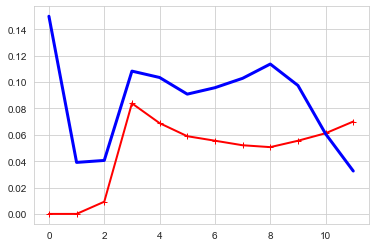

In [98]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, w, y)
plt.show()